In [98]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import os
import datetime

from PIL import Image

In [99]:
img = Image.open("sea.jpg")
img = np.array(img)
VIZ_DEGREE_RESOLUTION = 10

In [100]:
y_ticks_1 = np.arange(0, img.shape[0])
y_ticks_1 = np.where(y_ticks_1%30==0)[0]
y_ticks_1_viz = np.array([y_ticks_1[i] for i in range(0, y_ticks_1.shape[0], VIZ_DEGREE_RESOLUTION)])

In [101]:
x_ticks_1 = np.arange(0, img.shape[1])
x_ticks_1 = np.where(x_ticks_1%30==0)[0]
x_ticks_1_viz = np.array([x_ticks_1[i] for i in range(0, x_ticks_1.shape[0], VIZ_DEGREE_RESOLUTION)])

In [102]:
y_ticks_2 = -1*((y_ticks_1/y_ticks_1.max() * 180).astype(np.int64)-90)
y_ticks_2_viz = np.array([y_ticks_2[i] for i in range(0, y_ticks_2.shape[0], VIZ_DEGREE_RESOLUTION)])

In [103]:
x_ticks_2 = (x_ticks_1/x_ticks_1.max() * 360).astype(np.int64)-180
x_ticks_2_viz = np.array([x_ticks_2[i] for i in range(0, x_ticks_2.shape[0], VIZ_DEGREE_RESOLUTION)])

In [128]:
@njit
def p2c(x, y, img):
    new_x = x/img.shape[1]*360-180
    new_y = -1*(y/img.shape[0]*180-90)
    return (new_x, new_y)

p2c(0, 0, img)

(-180.0, 90.0)

In [129]:
@njit
def c2p(x, y, img):
    new_x = (x+180)/360*img.shape[1]
    new_y = (-1*y+90)/180*img.shape[0]
    return (new_x, new_y)

c2p(0, 0, img)

(5400.0, 2700.0)

(7080.0, 1889.9999999999998)


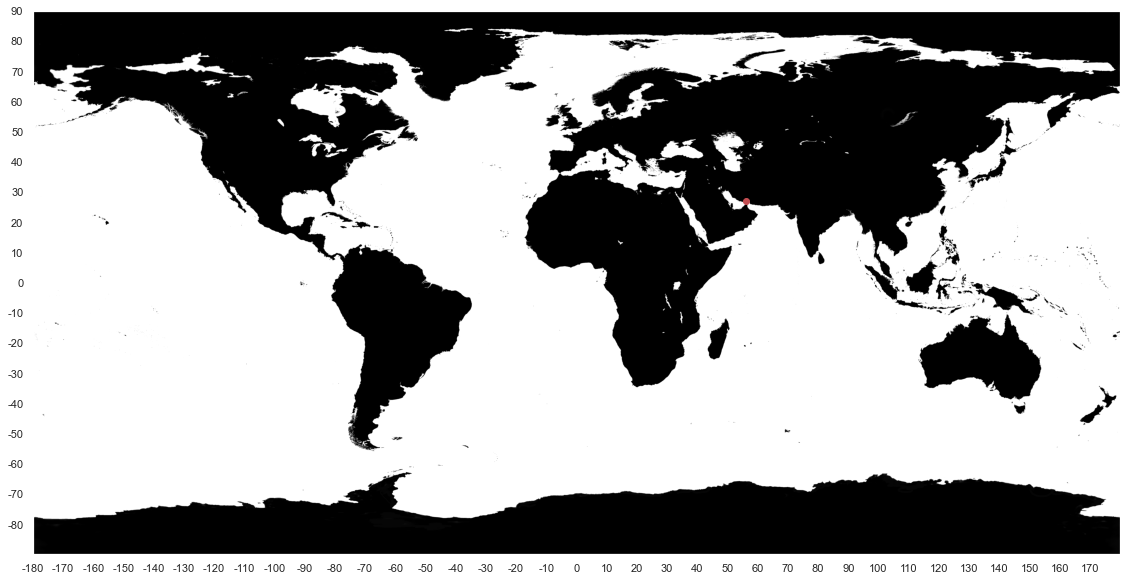

In [107]:
plt.figure(figsize=(20,10))
plt.yticks(y_ticks_1_viz, y_ticks_2_viz)
plt.xticks(x_ticks_1_viz, x_ticks_2_viz)
point = c2p(56, 27, img)
print(point)
plt.scatter([point[0]],[point[1]], c='r')
plt.imshow(img, cmap='gray')
plt.show()

In [130]:
from numba import jit, njit

In [135]:
@njit
def calculate_area(img):
    land_areas = np.zeros(181)
    for y in range(-90,90+1):
        for x in range(img.shape[1]):
            _, y_pixel = c2p(0, y, img)
            if img[int(y_pixel)-1, x] < 127:
                land_areas[y+90] += 1
    return land_areas

In [136]:
land_areas = calculate_area(img)

In [140]:
land_areas.shape

(181,)

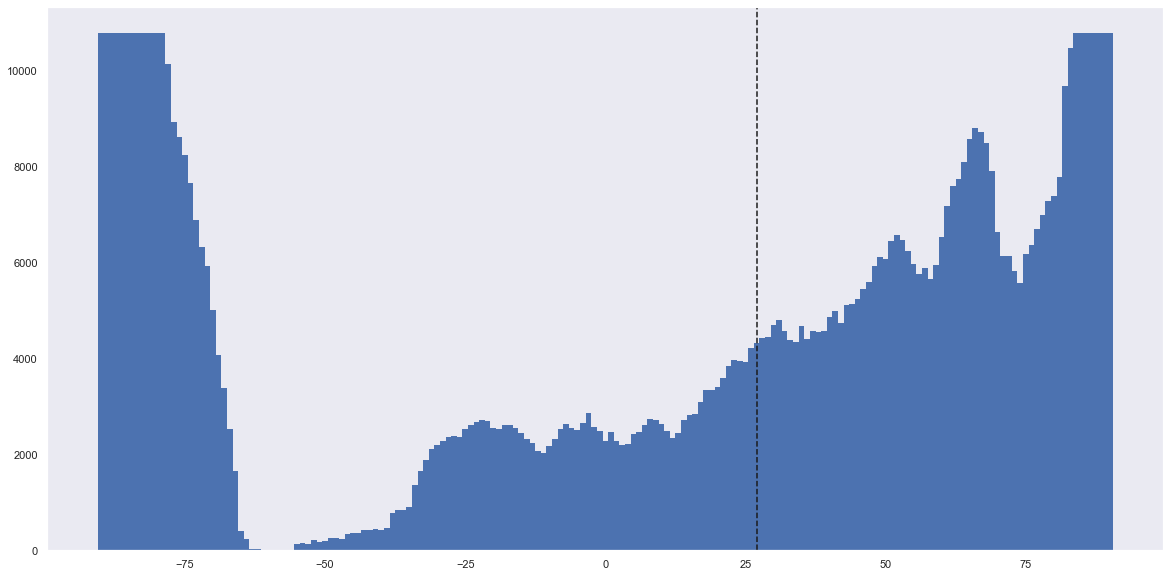

In [165]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(0,181)-90, land_areas, linewidth=0, width=1)
plt.axvline(x=27, color='k', linestyle='--')